https://github.com/HaloTech-Academy/Titanic-Classification-YouTube-Tutorial

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#menyiapkan data untuk simple barplot
count_sex = df['Sex'].value_counts()
index_sex = count_sex.index
value_sex = count_sex.values

In [ ]:
count_sex

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
index_sex

Index(['male', 'female'], dtype='object')

In [ ]:
value_sex

array([577, 314])

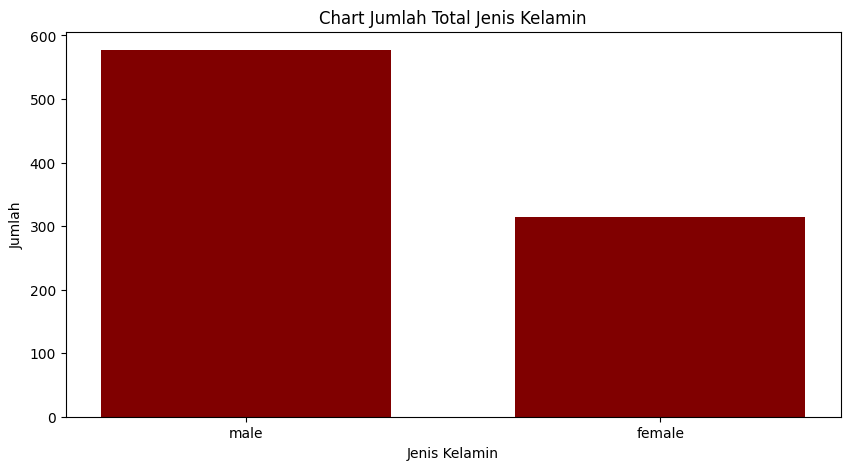

In [ ]:
#pembuatan simple bar plot
fig = plt.figure(figsize = (10,5))
plt.bar(index_sex, value_sex, color="maroon", width = 0.7)

plt.title("Chart Jumlah Total Jenis Kelamin") #menambahkan judul
plt.xlabel("Jenis Kelamin") #menambah judul di sumbu x
plt.ylabel("Jumlah") #menambah judul di sumbu y

plt.show()

In [ ]:
#membuat function untuk simple barchart

def bar_chart(column):
    count = df[column].value_counts()

    index=count.index
    values=count.values

    fig = plt.figure(figsize=(10,5))
    plt.bar(index, values, color="maroon", width=0.7)

    plt.show()

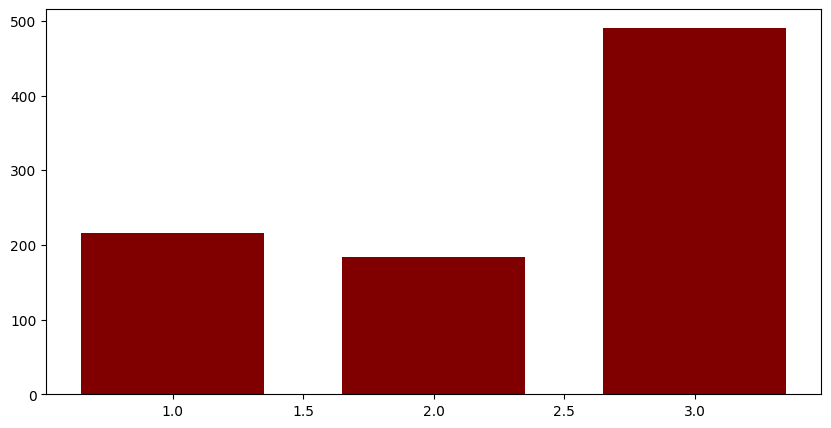

In [ ]:
bar_chart("Pclass")

In [ ]:
#membuat fungsi untuk grouped barchart/clutered barchart
def grouped_barchart(column):
  survived = df.groupby(['Survived', column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data=survived, kind = "bar",
      x="Survived", y="PassengerId", hue = column,
      palette="dark", height=6
  )

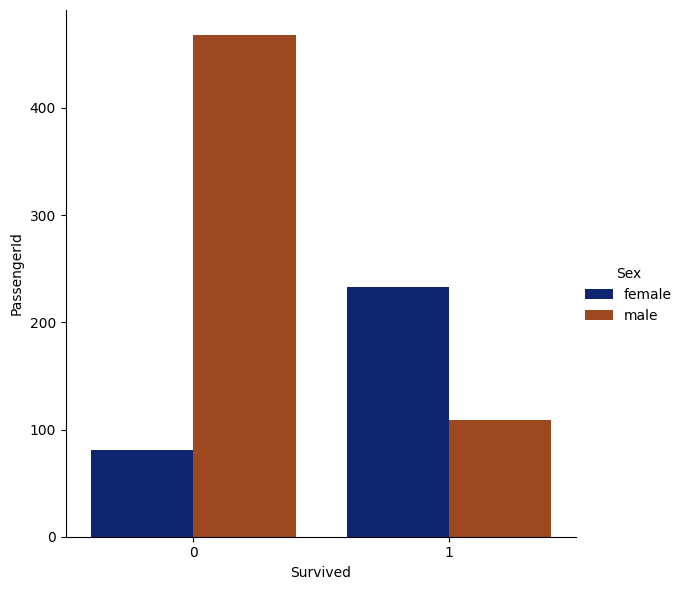

In [ ]:
grouped_barchart("Sex")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum() #melihat banyaknya mising data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#mengisi missing data kolom embarked, tipe datanya categori, sehingga menggunakan nilai mode
mode_embarked=df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(mode_embarked)

In [ ]:
#mengisi missing data kolom Age, tipe data numerik menggunakan nilai mean
mean_age=df['Age'].mean()
df['Age']=df['Age'].fillna(mean_age)

In [ ]:
df.isnull().sum() #melihat banyaknya mising data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df.shape

(891, 12)

karna selisih jumlah data dengan jumlah missing value Cabin sedikit, sehingga lebih baik kolom cabin dihilangkan

In [ ]:
df=df.drop(['Cabin'], axis=1)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Mengubah data kategorik menjadi numerik: yakni pada kolom Sex dan Embarked


In [ ]:
sex_mapping={"male":0, "female":1}

df['Sex']=df['Sex'].map(sex_mapping)

In [ ]:
embarked=df[['Embarked']]

dummies = pd.get_dummies(embarked)

In [ ]:
dummies

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
df = pd.merge(df.reset_index(), dummies.reset_index())

In [ ]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1


In [ ]:
#menghapus kolom yang tidak perlu
df = df.drop(["index", "Embarked"], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


In [ ]:
#menambah kolom Tittle dengan mengubah data kolom Name menjadi numerik berdasarkan Mr/Miss/Mrs...

df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand = False)

#mencari yang berawalan Kapital dan diakhiri tanda .

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,Mr


In [ ]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3,"Col":3,"Major":3, "Mlle":3, "Countess":3,
                "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3}

df['Title']=df['Title'].map(title_mapping)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


In [ ]:
#menghapus kolom yang sekiranya tidak dibutuhkan
df=df.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [ ]:
X=df.drop(['Survived'],1)
y=df['Survived']

<ipython-input-139-5e34165f59ff>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop(['Survived'],1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#membuat fungsi evaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
evaluasi_model(knn, X_test, y_test)

0.6927374301675978

In [ ]:
uploaded = files.upload()

Saving test.csv to test (1).csv


In [ ]:
data_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
sex_mapping={"male":0, "female":1}

data_test['Sex']=data_test['Sex'].map(sex_mapping)

In [ ]:
embarked=data_test[['Embarked']]

dummies = pd.get_dummies(embarked)

In [ ]:
dummies

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [ ]:
data_test = pd.merge(data_test.reset_index(), dummies.reset_index())

In [ ]:
data_test=data_test.drop(['Cabin'], axis=1)

In [ ]:
data_test.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,1,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,0,1
2,2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0
3,3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,0,1
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,0,1


In [ ]:
#menambah kolom Tittle dengan mengubah data kolom Name menjadi numerik berdasarkan Mr/Miss/Mrs...

data_test['Title']=data_test['Name'].str.extract('([A-Za-z]+)\.',expand = False)

#mencari yang berawalan Kapital dan diakhiri tanda .

In [ ]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3,"Col":3,"Major":3, "Mlle":3, "Countess":3,
                "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3}

data_test['Title']=data_test['Title'].map(title_mapping)

In [ ]:
data_test.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,1,0,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,0,1,2
2,2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0,0
3,3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,0,1,0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,0,1,2


In [ ]:
#menghapus kolom yang sekiranya tidak dibutuhkan
data_test=data_test.drop(["PassengerId","index", "Name", "Ticket", "Embarked"], axis=1)

In [ ]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,0,34.5,0,0,7.8292,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,2
2,2,0,62.0,0,0,9.6875,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,1,2


In [ ]:
data_test.isnull().sum()

Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Title          0
dtype: int64

In [ ]:
#mengisi missing data kolom Age dan Fare, tipe data numerik menggunakan nilai mean
mean_age=data_test['Age'].mean()
data_test['Age']=data_test['Age'].fillna(mean_age)

mean_fare=data_test['Fare'].mean()
data_test['Fare']=data_test['Fare'].fillna(mean_age)

In [ ]:
data_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Title         0
dtype: int64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction = knn.predict(data_test)

In [ ]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": prediction
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
submission.to_csv("submit.csv", index = False)

data_test['Survived'] = submission['Survived']
data_test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Survived
0,3,0,34.50000,0,0,7.8292,0,1,0,0,0
1,3,1,47.00000,1,0,7.0000,0,0,1,2,0
2,2,0,62.00000,0,0,9.6875,0,1,0,0,0
3,3,0,27.00000,0,0,8.6625,0,0,1,0,0
4,3,1,22.00000,1,1,12.2875,0,0,1,2,0
5,3,0,14.00000,0,0,9.2250,0,0,1,0,0
6,3,1,30.00000,0,0,7.6292,0,1,0,1,1
7,2,0,26.00000,1,1,29.0000,0,0,1,0,1
8,3,1,18.00000,0,0,7.2292,1,0,0,2,1
9,3,0,21.00000,2,0,24.1500,0,0,1,0,1


In [ ]:
data_test.to_csv("hasil submit data tes.csv", index = False)